In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
FEATURES = [
    'PTS', # points
    'REB', # rebounds
    'AST', # assists
    'STL', # steals
    'BLK', # blocks
    'TOV', # turnovers
    'FG3M', # 3-point field goals
    'TS_PCT', # true shooting percentage
    'USG_PCT', # usage percentage
    'PIE', # player impact estimate
    'PER', # player efficiency rating
    'WS', # win share
]

# Training the Model

In [3]:
train = pd.read_csv('./final_data/final_data.csv')

# replace NaN values with 0
train = train.fillna(0)

# we are trying to predict the all stars from the 2023 season, so remove 2023 season from training df
train = train[train.SEASON != 2023]
train

,SEASON,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,MIN,PTS,REB,AST,STL,BLK,TOV,FG3M,TS_PCT,USG_PCT,PIE,PER,WS,AS
0,1997,920,A.C. Green,1610612742,DAL,45,1027.570000,253,267,35,25,3,31,1,0.497385,0.119885,0.097000,13.987283,1.901209,0.0
1,1997,243,Aaron McKie,1610612765,DET,47,886.238333,208,107,96,40,17,51,24,0.412417,0.123583,0.102542,13.323805,1.495907,0.0
2,1997,1425,Aaron Williams,1610612763,VAN,4,38.856667,18,16,1,1,5,5,0,0.395750,0.117571,0.147500,25.123179,0.088643,0.0
3,1997,768,Acie Earl,1610612749,MIL,36,447.558333,154,83,18,12,25,33,0,0.261850,0.110455,0.005550,12.554787,0.392317,0.0
4,1997,228,Adam Keefe,1610612762,UTA,43,629.941667,153,155,26,22,8,31,0,0.421500,0.089367,0.067875,14.151856,1.359562,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12210,2022,1630163,LaMelo Ball,1610612766,CHA,53,1733.518333,1062,376,400,83,22,167,142,0.539536,0.267964,0.130286,23.662080,6.988815,1.0
12211,2022,1627749,Dejounte Murray,1610612759,SAS,52,1790.416667,1036,432,486,106,17,125,67,0.547600,0.270800,0.170350,26.682660,7.671213,1.0
12212,2022,1629636,Darius Garland,1610612739,CLE,47,1625.866667,953,156,374,56,5,176,121,0.628783,0.248087,0.137913,21.895625,6.317662,1.0
12213,2022,1629630,Ja Morant,1610612763,MEM,46,1526.170000,1233,269,316,56,18,157,69,0.580826,0.330957,0.169870,30.119643,8.649279,1.0


In [4]:
# setup for the model
np.random.seed(42)

X = train[FEATURES]
y = train['AS']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train);

In [5]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9714529186195143


# Predicting the 2023 Season

### Get 2023 Season Dataframe

In [6]:
pred_szn23 = pd.read_csv('./final_data/2023_season.csv')
pred_szn23 = pred_szn23.fillna(0)
pred_szn23[FEATURES]

,PTS,REB,AST,STL,BLK,TOV,FG3M,TS_PCT,USG_PCT,PIE,PER,WS
0,34,10,1,1,0,1,7,1.000000,0.041750,0.235000,16.600798,0.197544
1,121,28,12,5,0,7,33,0.436857,0.123875,-0.079429,14.810250,0.767501
2,514,114,55,38,7,33,82,0.494682,0.158360,0.051636,14.570039,2.502135
3,848,336,140,40,39,79,50,0.702789,0.202684,0.123947,23.803393,6.184702
4,211,66,65,27,10,29,31,0.449095,0.102720,0.045048,10.102069,0.934026
...,...,...,...,...,...,...,...,...,...,...,...,...
482,1518,360,274,100,38,205,162,0.567375,0.275313,0.122125,19.982443,6.796596
483,677,267,35,44,131,63,62,0.606385,0.224846,0.118615,24.884790,3.532671
484,955,181,483,84,19,126,138,0.591700,0.241800,0.151450,26.089906,8.708077
485,1291,223,322,55,18,138,80,0.578063,0.268937,0.129938,23.534423,8.125302


### Make Predictions

In [7]:
correct_labels = pred_szn23['AS']
with np.printoptions(threshold=np.inf):
    predictions = clf.predict(pred_szn23[FEATURES])
    score = np.mean(predictions == correct_labels)
    print(predictions)
    print(f'Accuracy Score: {score}')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### Putting it all Together

In [8]:
szn23 = pd.read_csv('./final_data/2023_season.csv')

# add predicted column to dataframe
szn23['PRED_AS'] = pd.DataFrame(predictions)

# keep only rows where the player was actually an all star in 2023, and rows that our model predicted 
# a player to be an all star in 2023
szn23 = szn23[(szn23['AS'] == 1) | (szn23['PRED_AS'] == 1)]

# create new column that checks if our model made the correct prediction or not
szn23['CORRECT_PRED'] = szn23.apply(lambda row: 'yes' if row['AS'] == row['PRED_AS'] else 'no', axis=1)
szn23 = szn23.sort_values(by=['CORRECT_PRED'])

In [9]:
final_results = szn23[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'AS', 'PRED_AS', 'CORRECT_PRED']]
final_results.to_csv('./final_data/2023_allStar_predictions.csv', index=False)
final_results

,PLAYER_NAME,TEAM_ABBREVIATION,AS,PRED_AS,CORRECT_PRED
21,Anthony Davis,LAL,0.0,1.0,no
478,Jaylen Brown,BOS,1.0,0.0,no
462,Jrue Holiday,MIL,1.0,0.0,no
483,Jaren Jackson Jr.,MEM,1.0,0.0,no
482,Anthony Edwards,MIN,1.0,0.0,no
211,Jimmy Butler,MIA,0.0,1.0,no
193,James Harden,PHI,0.0,1.0,no
182,Jalen Brunson,NYK,0.0,1.0,no
421,Trae Young,ATL,0.0,1.0,no
473,Bam Adebayo,MIA,1.0,0.0,no


Our model was able to correctly predict **22 out of 27** of the 2023 season's allstar selections 
giving us an accuracy score of **0.814**.

However, our model may be more accurate than it appears at first glance.
For example, James Harden and Trae Young, players that our model predicted as allstars,
were both viewed as players that should have made this year's allstar game.

Additionally, our model does not heavily consider defensive impact, which is why more defensive oriented players
such as Jaren Jackson, and Jrue Holiday were not predicted as allstars.
In hindsight, we would add more defence oriented features to train our model.


# PCA Analysis

In this section we perform a Principle Component Analysis in an attempt to see if we can infer anything 

In [10]:
import matplotlib.pyplot as plt
import seaborn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
seaborn.set()

In [12]:
szn23 = pd.read_csv('./final_data/2023_season.csv')
szn23 = szn23.fillna(0)

### Performing PCA

In [13]:
pca = PCA(2)
scale = StandardScaler()

X = szn23[FEATURES]
X_pca = pca.fit_transform(scale.fit_transform(X))

In [14]:
FEATURES

['PTS',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'FG3M',
 'TS_PCT',
 'USG_PCT',
 'PIE',
 'PER',
 'WS']

In [15]:
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.56597027 0.11372518]
[[ 0.36925716  0.30380902  0.32169455  0.31400783  0.20428296  0.35743012
   0.27339499  0.19216168  0.31397134  0.05977101  0.23999151  0.3582676 ]
 [-0.10775862  0.32976757 -0.26281923 -0.13698026  0.53682054 -0.13010962
  -0.38644762  0.35848936 -0.17547512  0.27704946  0.31816188  0.00823377]]


**First Principle Component:** <br>
It seems that the first component is weighted fairly evenly across most features, indicating that an all-star player typically performs well in these categories (in order of decreasing variance);
<ol>
    <li>Points</li>
    <li>Win Shares</li>
    <li>Turnovers</li>
    <li>Assists</li>
    <li>Steals</li>
    <li>Usage Percentage</li>
</ol>

**Second Principle Component:** <br>
The second component is weighted heavily towards these 3 features (in order of decreasing variance);
<ol>
    <li>Blocks</li>
    <li>True Shooting Percentage</li>
    <li>Rebounds</li>
</ol>

It is interesting to note that these features favor big man positions. I.e, Centers and power forwards

### Plotting

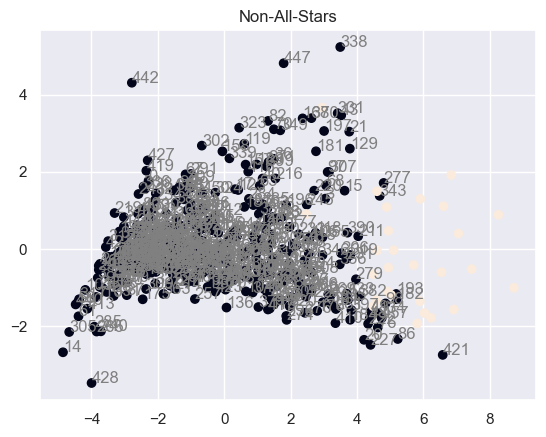

In [24]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=szn23['AS']);
plt.title('Non-All-Stars')
for i, (x, y) in enumerate(zip(X_pca[:, 0], X_pca[:, 1])):
    if szn23['AS'][i] == 0:
        plt.text(x, y, i, color='grey')

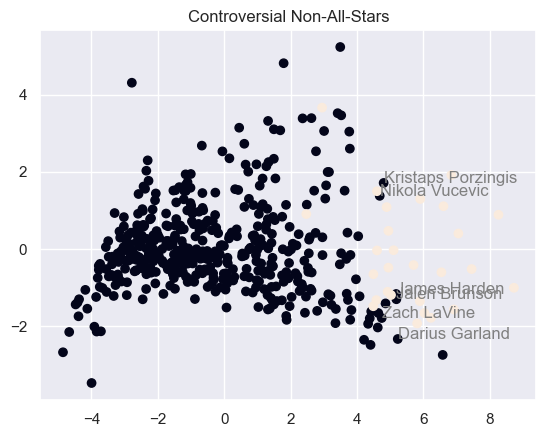

In [22]:
controversial_non_all_stars = [86, 193, 182, 277, 343, 457] # visually extracted from plot above

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=szn23['AS']);
plt.title('Controversial Non-All-Stars')
for i, (x, y) in enumerate(zip(X_pca[:, 0], X_pca[:, 1])):
    if i in controversial_non_all_stars:
        player_name = szn23.iloc[i]['PLAYER_NAME']
        plt.text(x, y, player_name, color='grey')

Here, we are interested in seeing which players that were playing at a level comparable to the allstar's of 2023, but were not selected for the all-star game

It is interesting to see that there are some names that our model selected; <br>
Notably, **James Harden, Kristaps Porzingis, and Jalen Brunson**

All 3 of these players were notable all-star snubs for the 2023 season, with Harden leading the league in assists, and Porzingis being cited as a top 3 center in the East (https://www.si.com/nba/wizards/news/biggest-allstar-snub-kristaps-porzingis-or-kyle-kuzma). 

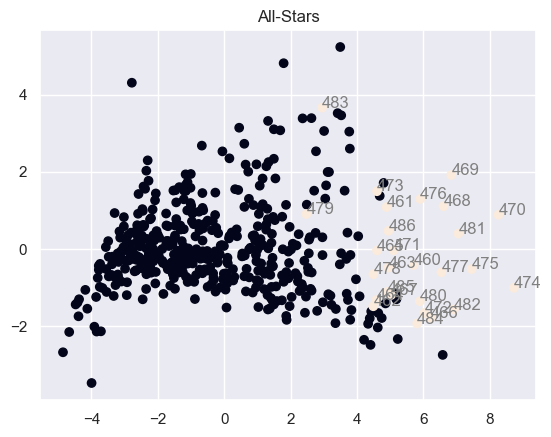

In [25]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=szn23['AS']);
plt.title('All-Stars')
for i, (x, y) in enumerate(zip(X_pca[:, 0], X_pca[:, 1])):
    if szn23['AS'][i] == 1:
        plt.text(x, y, i, color='grey')

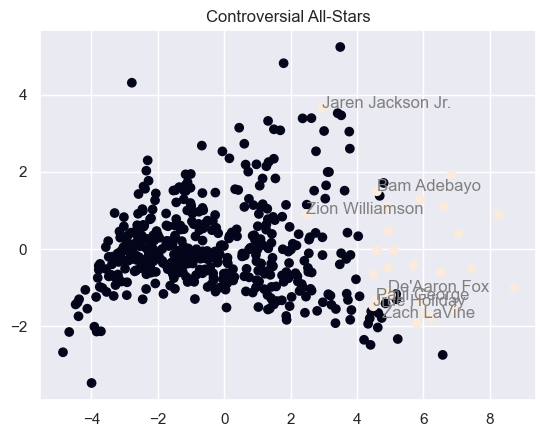

In [21]:
controversial_all_stars = [483, 479, 473, 462, 464, 457, 485] # visually extracted from plot above

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=szn23['AS']);
plt.title('Controversial All-Stars')
for i, (x, y) in enumerate(zip(X_pca[:, 0], X_pca[:, 1])):
    if i in controversial_all_stars:
        player_name = szn23.iloc[i]['PLAYER_NAME']
        plt.text(x, y, player_name, color='grey')


Here, we are interested in seeing which players were potentially controversial all-star selections (according to this PCA analysis)

An interesting case seems to be **Zion Williamson**. Zion this year only played 29 games out of the 50 or so games prior to the all-star break, meaning that his stat totals suffered as a result. This may explain why he seems to be surrounded by non-all-star players in the plot above despite playing at a very high-level for the season.

It is also worth mentioning that **Jaren Jackson JR**. was the defensive player of the year in 2023, hence why he seems to rank so highly on the y-axis of this plot. The y-axis represents the second principle component which seems to be more oriented towards defensive features such as blocks and rebounds.

There are also names that our model did not select; <br>
Notably, **Jaren Jackson Jr., Bam Adebayo, and Jrue Holiday**